In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sb
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tweet1 = pd.read_csv("./tweets_2018_lite.csv",lineterminator='\n')
tweet1.head()

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count
0,953749974365474821,2018-01-17 22:04:48+00:00,"[ Luke Mitchell y Amber Heard, chillando. http...",861511449776201728,StuartBlxck,╾ Sᴛᴜᴀʀᴛ 𝐅𝐂 𝐀𝐔!,2017-05-08 09:21:50+00:00,⌖ 𝙴𝚡 𝙲𝚎𝚛𝚋𝚎𝚛𝚞𝚜 𝙰𝚐𝚎𝚗𝚝. ╮ 𝘽𝙔𝙍𝙉𝙀 𝑂’𝐶𝐴𝐿𝐿𝐴𝐺𝐻𝐴𝑁 ₁/₅ ◣...,http://pbs.twimg.com/profile_images/1383461196...,https://pbs.twimg.com/profile_banners/86151144...,https://t.co/ZWO1FYzQY8,26571,1075,458
1,953741174321197056,2018-01-17 21:29:50+00:00,I’ve seen this so many times on tumblr and it’...,546158471,peachiemo,m,2012-04-05 17:52:19+00:00,✨ titties out for twice✨ she/her/hers,http://pbs.twimg.com/profile_images/1260291512...,https://pbs.twimg.com/profile_banners/54615847...,NaN,38604,534,472
2,953736042456248322,2018-01-17 21:09:26+00:00,@stirgussa @Jia_S_ @AuthorNDSettemi @Agnieszka...,811853284113780736,DazzlingMaria_,Maria,2016-12-22 08:38:01+00:00,Life is about breaking our personal limits and...,http://pbs.twimg.com/profile_images/1261350465...,https://pbs.twimg.com/profile_banners/81185328...,NaN,910,101,101
3,953692484886061056,2018-01-17 18:16:21+00:00,Etats-Unis: Amber Heard et Elon Musk ont remis...,2999860517,SuisseSUI,Actualités Suisse,2015-01-26 16:04:41+00:00,"Actualité monde, politique, société, santé - ...",http://pbs.twimg.com/profile_images/6082358861...,https://pbs.twimg.com/profile_banners/29998605...,NaN,326471,3496,318
4,953689278097383425,2018-01-17 18:03:37+00:00,amber heard | icons ɞ https://t.co/5Cdl3AfVEG,715387794449780737,fivecolorsicons,ೃ✧.҅ ғıvеcоlогѕ,2016-03-31 03:58:36+00:00,°•°•°•° follow to not lose any post guys!\n❀ p...,http://pbs.twimg.com/profile_images/8251315957...,https://pbs.twimg.com/profile_banners/71538779...,https://t.co/00Z51Avp2f,1632,28,35


In [4]:
tweet1["user.created_at"] = tweet1["user.created_at"].astype(str).str.split("+").str[0]
tweet1["created_at"] = tweet1["created_at"].astype(str).str.split("+").str[0]

In [5]:
my_format = '%Y-%m-%d %H:%M:%S'
tweet1['user.created_at'] = pd.to_datetime(tweet1['user.created_at'], format=my_format)
tweet1['created_at'] = pd.to_datetime(tweet1['created_at'], format=my_format)

In [6]:
tweet1['diff'] = abs(tweet1['user.created_at'] - tweet1['created_at'])
tweet1

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,diff
0,953749974365474821,2018-01-17 22:04:48,"[ Luke Mitchell y Amber Heard, chillando. http...",861511449776201728,StuartBlxck,╾ Sᴛᴜᴀʀᴛ 𝐅𝐂 𝐀𝐔!,2017-05-08 09:21:50,⌖ 𝙴𝚡 𝙲𝚎𝚛𝚋𝚎𝚛𝚞𝚜 𝙰𝚐𝚎𝚗𝚝. ╮ 𝘽𝙔𝙍𝙉𝙀 𝑂’𝐶𝐴𝐿𝐿𝐴𝐺𝐻𝐴𝑁 ₁/₅ ◣...,http://pbs.twimg.com/profile_images/1383461196...,https://pbs.twimg.com/profile_banners/86151144...,https://t.co/ZWO1FYzQY8,26571,1075,458,254 days 12:42:58
1,953741174321197056,2018-01-17 21:29:50,I’ve seen this so many times on tumblr and it’...,546158471,peachiemo,m,2012-04-05 17:52:19,✨ titties out for twice✨ she/her/hers,http://pbs.twimg.com/profile_images/1260291512...,https://pbs.twimg.com/profile_banners/54615847...,NaN,38604,534,472,2113 days 03:37:31
2,953736042456248322,2018-01-17 21:09:26,@stirgussa @Jia_S_ @AuthorNDSettemi @Agnieszka...,811853284113780736,DazzlingMaria_,Maria,2016-12-22 08:38:01,Life is about breaking our personal limits and...,http://pbs.twimg.com/profile_images/1261350465...,https://pbs.twimg.com/profile_banners/81185328...,NaN,910,101,101,391 days 12:31:25
3,953692484886061056,2018-01-17 18:16:21,Etats-Unis: Amber Heard et Elon Musk ont remis...,2999860517,SuisseSUI,Actualités Suisse,2015-01-26 16:04:41,"Actualité monde, politique, société, santé - ...",http://pbs.twimg.com/profile_images/6082358861...,https://pbs.twimg.com/profile_banners/29998605...,NaN,326471,3496,318,1087 days 02:11:40
4,953689278097383425,2018-01-17 18:03:37,amber heard | icons ɞ https://t.co/5Cdl3AfVEG,715387794449780737,fivecolorsicons,ೃ✧.҅ ғıvеcоlогѕ,2016-03-31 03:58:36,°•°•°•° follow to not lose any post guys!\n❀ p...,http://pbs.twimg.com/profile_images/8251315957...,https://pbs.twimg.com/profile_banners/71538779...,https://t.co/00Z51Avp2f,1632,28,35,657 days 14:05:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37181,1074328123246764034,2018-12-16 15:39:19,ครั้งหนึ่งความรักของ Johny Depp กับ Amber Hear...,3313888159,Universalrevi3w,รีวิวเรื่อยเปื่อย,2015-08-13 00:49:57,เพจรีวิวเรื่อยเปื่อย,http://pbs.twimg.com/profile_images/8491402799...,https://pbs.twimg.com/profile_banners/33138881...,https://t.co/7u4e1xoS3B,27710,2795,169,1221 days 14:49:22
37182,1074327392196251650,2018-12-16 15:36:24,"Favorit q sepanjang film, mb Mera aka Amber He...",85278001,Gibrannochigaro,ZsaZsa Utari Stan Account,2009-10-26 09:36:38,Masyarakat Sehat | Ulas Jersey on youtube | gi...,http://pbs.twimg.com/profile_images/1366093275...,https://pbs.twimg.com/profile_banners/85278001...,https://t.co/CFNyF2Kbvf,100411,798,725,3338 days 05:59:46
37183,1074327147119038465,2018-12-16 15:35:26,"leo lins faz entrevista com a amber heard, faz...",2993861138,laliwithvanilla,l a l i ‎✵,2015-01-23 23:14:39,she/her | | | infp | | | 20,http://pbs.twimg.com/profile_images/1386477462...,https://pbs.twimg.com/profile_banners/29938611...,https://t.co/a1HSZ4hV14,10783,303,338,1422 days 16:20:47
37184,1074325999146348544,2018-12-16 15:30:52,Rp amber heard ayo mendekat,940533309020368896,hellaintgood,Karl,2017-12-12 10:46:29,(𝐑𝐏/𝐅𝐋) manners maketh man.,http://pbs.twimg.com/profile_images/1326146370...,https://pbs.twimg.com/profile_banners/94053330...,NaN,43615,1179,976,369 days 04:44:23


In [7]:
tweet1["days"] = tweet1["diff"].astype(str).str.split(" ").str[0]
tweet1["hours"] = tweet1["diff"].astype(str).str.split(" ").str[2]
tweet1.drop(['diff'], axis=1, inplace=True)

In [8]:
def tweet_usr_date_time(df):
    df['tweet_date'] = df.created_at.astype(str).str.split(" ").str[0]
    df['tweet_time'] = df.created_at.astype(str).str.split(" ").str[1]
    df['user_create_date'] = df["user.created_at"].astype(str).str.split(" ").str[0]
    df['user_create_time'] = df["user.created_at"].astype(str).str.split(" ").str[1]
    df = df.reset_index(drop=True)
    return df
tweet_usr_date_time(tweet1)

,id_str,created_at,full_text,user.id_str,user.screen_name,user.name,user.created_at,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,user.followers_count,user.friends_count,days,hours,tweet_date,tweet_time,user_create_date,user_create_time
0,953749974365474821,2018-01-17 22:04:48,"[ Luke Mitchell y Amber Heard, chillando. http...",861511449776201728,StuartBlxck,╾ Sᴛᴜᴀʀᴛ 𝐅𝐂 𝐀𝐔!,2017-05-08 09:21:50,⌖ 𝙴𝚡 𝙲𝚎𝚛𝚋𝚎𝚛𝚞𝚜 𝙰𝚐𝚎𝚗𝚝. ╮ 𝘽𝙔𝙍𝙉𝙀 𝑂’𝐶𝐴𝐿𝐿𝐴𝐺𝐻𝐴𝑁 ₁/₅ ◣...,http://pbs.twimg.com/profile_images/1383461196...,https://pbs.twimg.com/profile_banners/86151144...,https://t.co/ZWO1FYzQY8,26571,1075,458,254,12:42:58.000000000,2018-01-17,22:04:48,2017-05-08,09:21:50
1,953741174321197056,2018-01-17 21:29:50,I’ve seen this so many times on tumblr and it’...,546158471,peachiemo,m,2012-04-05 17:52:19,✨ titties out for twice✨ she/her/hers,http://pbs.twimg.com/profile_images/1260291512...,https://pbs.twimg.com/profile_banners/54615847...,NaN,38604,534,472,2113,03:37:31.000000000,2018-01-17,21:29:50,2012-04-05,17:52:19
2,953736042456248322,2018-01-17 21:09:26,@stirgussa @Jia_S_ @AuthorNDSettemi @Agnieszka...,811853284113780736,DazzlingMaria_,Maria,2016-12-22 08:38:01,Life is about breaking our personal limits and...,http://pbs.twimg.com/profile_images/1261350465...,https://pbs.twimg.com/profile_banners/81185328...,NaN,910,101,101,391,12:31:25.000000000,2018-01-17,21:09:26,2016-12-22,08:38:01
3,953692484886061056,2018-01-17 18:16:21,Etats-Unis: Amber Heard et Elon Musk ont remis...,2999860517,SuisseSUI,Actualités Suisse,2015-01-26 16:04:41,"Actualité monde, politique, société, santé - ...",http://pbs.twimg.com/profile_images/6082358861...,https://pbs.twimg.com/profile_banners/29998605...,NaN,326471,3496,318,1087,02:11:40.000000000,2018-01-17,18:16:21,2015-01-26,16:04:41
4,953689278097383425,2018-01-17 18:03:37,amber heard | icons ɞ https://t.co/5Cdl3AfVEG,715387794449780737,fivecolorsicons,ೃ✧.҅ ғıvеcоlогѕ,2016-03-31 03:58:36,°•°•°•° follow to not lose any post guys!\n❀ p...,http://pbs.twimg.com/profile_images/8251315957...,https://pbs.twimg.com/profile_banners/71538779...,https://t.co/00Z51Avp2f,1632,28,35,657,14:05:01.000000000,2018-01-17,18:03:37,2016-03-31,03:58:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37181,1074328123246764034,2018-12-16 15:39:19,ครั้งหนึ่งความรักของ Johny Depp กับ Amber Hear...,3313888159,Universalrevi3w,รีวิวเรื่อยเปื่อย,2015-08-13 00:49:57,เพจรีวิวเรื่อยเปื่อย,http://pbs.twimg.com/profile_images/8491402799...,https://pbs.twimg.com/profile_banners/33138881...,https://t.co/7u4e1xoS3B,27710,2795,169,1221,14:49:22.000000000,2018-12-16,15:39:19,2015-08-13,00:49:57
37182,1074327392196251650,2018-12-16 15:36:24,"Favorit q sepanjang film, mb Mera aka Amber He...",85278001,Gibrannochigaro,ZsaZsa Utari Stan Account,2009-10-26 09:36:38,Masyarakat Sehat | Ulas Jersey on youtube | gi...,http://pbs.twimg.com/profile_images/1366093275...,https://pbs.twimg.com/profile_banners/85278001...,https://t.co/CFNyF2Kbvf,100411,798,725,3338,05:59:46.000000000,2018-12-16,15:36:24,2009-10-26,09:36:38
37183,1074327147119038465,2018-12-16 15:35:26,"leo lins faz entrevista com a amber heard, faz...",2993861138,laliwithvanilla,l a l i ‎✵,2015-01-23 23:14:39,she/her | | | infp | | | 20,http://pbs.twimg.com/profile_images/1386477462...,https://pbs.twimg.com/profile_banners/29938611...,https://t.co/a1HSZ4hV14,10783,303,338,1422,16:20:47.000000000,2018-12-16,15:35:26,2015-01-23,23:14:39
37184,1074325999146348544,2018-12-16 15:30:52,Rp amber heard ayo mendekat,940533309020368896,hellaintgood,Karl,2017-12-12 10:46:29,(𝐑𝐏/𝐅𝐋) manners maketh man.,http://pbs.twimg.com/profile_images/1326146370...,https://pbs.twimg.com/profile_banners/94053330...,NaN,43615,1179,976,369,04:44:23.000000000,2018-12-16,15:30:52,2017-12-12,10:46:29


In [9]:
drop_list = ['user.created_at','created_at']
def y_m_d(df):
    df['tweet_date'] = pd.to_datetime(df['tweet_date'])
    df['tweet_year'] = (df.tweet_date.dt.strftime('%Y')).astype('int')
#     df['tweet_day'] = df.tweet_date.dt.strftime('%A')
    df['tweet_month'] = df.tweet_date.dt.strftime('%B')
    
    df['user_create_date'] = pd.to_datetime(df['user_create_date'])
    df['usr_year'] = (df.user_create_date.dt.strftime('%Y')).astype('int')
#     df['usr_day'] = df.user_create_date.dt.strftime('%A')
    df['usr_month'] = df.user_create_date.dt.strftime('%B')
    
    df.drop(drop_list, axis=1, inplace=True)
    return df
y_m_d(tweet1)

,id_str,full_text,user.id_str,user.screen_name,user.name,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,...,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,953749974365474821,"[ Luke Mitchell y Amber Heard, chillando. http...",861511449776201728,StuartBlxck,╾ Sᴛᴜᴀʀᴛ 𝐅𝐂 𝐀𝐔!,⌖ 𝙴𝚡 𝙲𝚎𝚛𝚋𝚎𝚛𝚞𝚜 𝙰𝚐𝚎𝚗𝚝. ╮ 𝘽𝙔𝙍𝙉𝙀 𝑂’𝐶𝐴𝐿𝐿𝐴𝐺𝐻𝐴𝑁 ₁/₅ ◣...,http://pbs.twimg.com/profile_images/1383461196...,https://pbs.twimg.com/profile_banners/86151144...,https://t.co/ZWO1FYzQY8,26571,...,254,12:42:58.000000000,2018-01-17,22:04:48,2017-05-08,09:21:50,2018,January,2017,May
1,953741174321197056,I’ve seen this so many times on tumblr and it’...,546158471,peachiemo,m,✨ titties out for twice✨ she/her/hers,http://pbs.twimg.com/profile_images/1260291512...,https://pbs.twimg.com/profile_banners/54615847...,NaN,38604,...,2113,03:37:31.000000000,2018-01-17,21:29:50,2012-04-05,17:52:19,2018,January,2012,April
2,953736042456248322,@stirgussa @Jia_S_ @AuthorNDSettemi @Agnieszka...,811853284113780736,DazzlingMaria_,Maria,Life is about breaking our personal limits and...,http://pbs.twimg.com/profile_images/1261350465...,https://pbs.twimg.com/profile_banners/81185328...,NaN,910,...,391,12:31:25.000000000,2018-01-17,21:09:26,2016-12-22,08:38:01,2018,January,2016,December
3,953692484886061056,Etats-Unis: Amber Heard et Elon Musk ont remis...,2999860517,SuisseSUI,Actualités Suisse,"Actualité monde, politique, société, santé - ...",http://pbs.twimg.com/profile_images/6082358861...,https://pbs.twimg.com/profile_banners/29998605...,NaN,326471,...,1087,02:11:40.000000000,2018-01-17,18:16:21,2015-01-26,16:04:41,2018,January,2015,January
4,953689278097383425,amber heard | icons ɞ https://t.co/5Cdl3AfVEG,715387794449780737,fivecolorsicons,ೃ✧.҅ ғıvеcоlогѕ,°•°•°•° follow to not lose any post guys!\n❀ p...,http://pbs.twimg.com/profile_images/8251315957...,https://pbs.twimg.com/profile_banners/71538779...,https://t.co/00Z51Avp2f,1632,...,657,14:05:01.000000000,2018-01-17,18:03:37,2016-03-31,03:58:36,2018,January,2016,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37181,1074328123246764034,ครั้งหนึ่งความรักของ Johny Depp กับ Amber Hear...,3313888159,Universalrevi3w,รีวิวเรื่อยเปื่อย,เพจรีวิวเรื่อยเปื่อย,http://pbs.twimg.com/profile_images/8491402799...,https://pbs.twimg.com/profile_banners/33138881...,https://t.co/7u4e1xoS3B,27710,...,1221,14:49:22.000000000,2018-12-16,15:39:19,2015-08-13,00:49:57,2018,December,2015,August
37182,1074327392196251650,"Favorit q sepanjang film, mb Mera aka Amber He...",85278001,Gibrannochigaro,ZsaZsa Utari Stan Account,Masyarakat Sehat | Ulas Jersey on youtube | gi...,http://pbs.twimg.com/profile_images/1366093275...,https://pbs.twimg.com/profile_banners/85278001...,https://t.co/CFNyF2Kbvf,100411,...,3338,05:59:46.000000000,2018-12-16,15:36:24,2009-10-26,09:36:38,2018,December,2009,October
37183,1074327147119038465,"leo lins faz entrevista com a amber heard, faz...",2993861138,laliwithvanilla,l a l i ‎✵,she/her | | | infp | | | 20,http://pbs.twimg.com/profile_images/1386477462...,https://pbs.twimg.com/profile_banners/29938611...,https://t.co/a1HSZ4hV14,10783,...,1422,16:20:47.000000000,2018-12-16,15:35:26,2015-01-23,23:14:39,2018,December,2015,January
37184,1074325999146348544,Rp amber heard ayo mendekat,940533309020368896,hellaintgood,Karl,(𝐑𝐏/𝐅𝐋) manners maketh man.,http://pbs.twimg.com/profile_images/1326146370...,https://pbs.twimg.com/profile_banners/94053330...,NaN,43615,...,369,04:44:23.000000000,2018-12-16,15:30:52,2017-12-12,10:46:29,2018,December,2017,December


In [10]:
sorted_fresh_usr = tweet1.sort_values(["days"], ascending=True)
sorted_fresh_usr.head()

,id_str,full_text,user.id_str,user.screen_name,user.name,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,...,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
30435,1075814459975835648,AMBER HEARD DAILY ● Votre source française déd...,1075784710389985281,ahearddaily,Amber Heard Daily,Your most completed fan account dedicated to t...,http://pbs.twimg.com/profile_images/1363931518...,https://pbs.twimg.com/profile_banners/10757847...,https://t.co/hT9fpXu3KB,893,...,0,01:58:13.000000000,2018-12-20,18:05:29,2018-12-20,16:07:16,2018,December,2018,December
23476,1049446873562587137,I don't know the whole situation with Johnny D...,1049442144577052672,RougeWild,The Wild Hunt,Gamer/Animal-lover/Digital Artist (sometimes)/...,http://pbs.twimg.com/profile_images/1049444164...,https://pbs.twimg.com/profile_banners/10494421...,NaN,18,...,0,00:18:48.000000000,2018-10-08,23:50:07,2018-10-08,23:31:19,2018,October,2018,October
13072,1023383244060803072,"AQUAMAN 2018 : Jason , Amber Heard Superhero M...",1023045188464177152,OhsemV,Ohsem_Viral,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,6,...,0,22:23:19.000000000,2018-07-29,01:42:33,2018-07-28,03:19:14,2018,July,2018,July
29066,1078581466185949184,this is like only my second tweet but let it b...,1078236203642585089,shusreen,shireen,teh but make it tarik | https://t.co/hvaCku8NBl,http://pbs.twimg.com/profile_images/1363801856...,https://pbs.twimg.com/profile_banners/10782362...,https://t.co/KzW64aIUjA,5913,...,0,22:51:57.000000000,2018-12-28,09:20:35,2018-12-27,10:28:38,2018,December,2018,December
29081,1078697761267204097,@AlbertsStuff we love a salty sister amber hea...,1078695623522693120,Ruby87131098,Ruby,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,4,...,0,00:08:30.000000000,2018-12-28,17:02:42,2018-12-28,16:54:12,2018,December,2018,December


In [13]:
sorted_fresh_usr.to_csv('tweet_diff_2018.csv', index=False)

In [14]:
sorted_usr_year = tweet1.sort_values(["usr_year"], ascending=False)
sorted_usr_year

,id_str,full_text,user.id_str,user.screen_name,user.name,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,...,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
21433,1050777390367035392,@mrreactionary do all victims hit their abuser...,991243906674319360,__jacxpearls,.,moved to: @jacxpearl,http://pbs.twimg.com/profile_images/1317074207...,NaN,NaN,27273,...,164,06:44:49.000000000,2018-10-12,15:57:07,2018-05-01,09:12:18,2018,October,2018,May
23476,1049446873562587137,I don't know the whole situation with Johnny D...,1049442144577052672,RougeWild,The Wild Hunt,Gamer/Animal-lover/Digital Artist (sometimes)/...,http://pbs.twimg.com/profile_images/1049444164...,https://pbs.twimg.com/profile_banners/10494421...,NaN,18,...,0,00:18:48.000000000,2018-10-08,23:50:07,2018-10-08,23:31:19,2018,October,2018,October
23463,1049281462816661505,@Independent thank you for contributing to Amb...,991251741030146049,swarkles4,Christina,"You keep giving up on people so quickly, you'r...",http://pbs.twimg.com/profile_images/1053778320...,https://pbs.twimg.com/profile_banners/99125174...,NaN,2077,...,160,03:09:24.000000000,2018-10-08,12:52:50,2018-05-01,09:43:26,2018,October,2018,May
23443,1049298370588807168,@KarenStarrToH || Es un pelucón. Si pones en G...,1046785223969697794,AndyGibbRP,Andy Gibb (Fake),Sιᥒgᥱr. Yoᥙᥒgᥱr brothᥱr of @BarryAGibb @barryg...,http://pbs.twimg.com/profile_images/1258955546...,https://pbs.twimg.com/profile_banners/10467852...,NaN,501,...,6,22:26:21.000000000,2018-10-08,14:00:01,2018-10-01,15:33:40,2018,October,2018,October
23439,1049091823250165760,Aquaman' Official Extended Trailer 2018 Jason ...,1022913275049242624,hot_limited,RoyalPlayz,Guys make sure to check out my YouTube channel...,http://pbs.twimg.com/profile_images/1054126175...,https://pbs.twimg.com/profile_banners/10229132...,NaN,18,...,72,05:44:12.000000000,2018-10-08,00:19:16,2018-07-27,18:35:04,2018,October,2018,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21176,1047602215924498437,"Johnny Depp says the ""truth"" about Amber Heard...",2884771,Newsweek,Newsweek,The freedom to disagree. Our staff likes to tw...,http://pbs.twimg.com/profile_images/7416034959...,https://pbs.twimg.com/profile_banners/2884771/...,https://t.co/92gD7evE72,265340,...,4206,01:48:55.000000000,2018-10-03,21:40:06,2007-03-29,19:51:11,2018,October,2007,March
34195,1073768732869169152,Amber Heard ❤️,11086752,edowoo,Edo / えど,Ariqueño. Trabajo en digital y en redes social...,http://pbs.twimg.com/profile_images/1299415905...,https://pbs.twimg.com/profile_banners/11086752...,https://t.co/xHpb0Vu3PU,97595,...,4020,13:20:07.000000000,2018-12-15,02:36:30,2007-12-12,13:16:23,2018,December,2007,December
25133,1048007026486497280,I liked a @YouTube video https://t.co/dutb1ySG...,5981342,lkafle,WowDevQA,Founder: Wow: Development: Quality: Assurance:...,http://pbs.twimg.com/profile_images/1385946755...,https://pbs.twimg.com/profile_banners/5981342/...,https://t.co/cqMTslSAA5,306328,...,4163,19:39:26.000000000,2018-10-05,00:28:40,2007-05-12,04:49:14,2018,October,2007,May
2263,959392978484645888,Der zweite Laufpass - Elon Musk und Amber Hear...,9330602,BILD_Promis,BILD Promis,Promi-News von BILD und den Show-Reportern dir...,http://pbs.twimg.com/profile_images/9162518020...,https://pbs.twimg.com/profile_banners/9330602/...,http://t.co/9uaMLCEn0I,95254,...,3768,20:44:18.000000000,2018-02-02,11:48:05,2007-10-09,15:03:47,2018,February,2007,October


In [15]:
tweet_df = pd.read_csv("tweet_diff_18.csv")

In [16]:
tweet_df['user.id_str'] = tweet_df['user.id_str'].astype(str)

In [17]:
all_users_tweeted = tweet_df['user.id_str'].nunique()
print('no. of unique users in the dataset is:',all_users_tweeted)

no. of unique users in the dataset is: 19105


In [18]:
tweet_df[tweet_df.tweet_month == 'January'].shape[0]

2099

In [25]:
x = tweet_df[tweet_df['usr_year']== 2018]
print('no. of tweets from users created in 2018 are...',x.shape[0])

y = tweet_df[tweet_df['usr_year']!= 2018]
print('no. of tweets from users created in rest years are...',y.shape[0])

z = tweet_df[tweet_df['days'] <= 10]
print('no. of tweets in the same day of usr creation in 2018 are...',z.shape[0])

no. of tweets from users created in 2018 are... 3452
no. of tweets from users created in rest years are... 33734
no. of tweets in the same day of usr creation in 2018 are... 331


In [27]:
print('proportion of tweets from users created in 2018 is {}%'.format((tweet_df['usr_year'] == 2018).mean()*100))

proportion of tweets from users created in 2018 is 9.283063518528479%


In [28]:
prob_same_day = (tweet_df[tweet_df.days <= 1].shape[0]/ tweet_df[tweet_df.usr_year == 2018].shape[0])*100
prob_14_days = (tweet_df[tweet_df.days <= 14].shape[0]/ tweet_df[tweet_df.usr_year == 2018].shape[0])*100


print(' the probability of tweets in the same day for all 2018 users {}%'.format(prob_same_day))
print(' the probability of tweets within 14 days only for all 2018 users {}%'.format(prob_14_days))

 the probability of tweets in the same day for all 2018 users 3.8528389339513325%
 the probability of tweets within 14 days only for all 2018 users 12.16685979142526%


# Exploring some features
### after calculation of the days diff between the created usr and tweet in 2018 i found that

In [123]:
fresh_users_2020 = tweet_df.groupby(['user.id_str','tweet_year','usr_year']).size().reset_index(name='user_id_count')
fresh_users_2020 = fresh_users_2020[fresh_users_2020['usr_year'] == 2018]
print('No. of users created in 2018 is: {}'.format(fresh_users_2020.shape[0]))
print('no. of proportion of users created in 2018 are :{}%'.format((fresh_users_2020.shape[0]/all_users_tweeted)*100))


No. of users created in 2018 is: 1658
no. of proportion of users created in 2018 are :8.678356451190787%


In [30]:
w = fresh_users_2020.sort_values(["user_id_count"], ascending=False)
w

,user.id_str,tweet_year,usr_year,user_id_count
18928,991243906674319360,2018,2018,157
18929,991251741030146049,2018,2018,100
18823,986362557572304896,2018,2018,61
819,1047628248111300610,2018,2018,57
231,1010592288945287169,2018,2018,56
...,...,...,...,...
815,1047283041209667584,2018,2018,1
814,1047236423634628610,2018,2018,1
813,1047230779963715585,2018,2018,1
811,1047219081483620353,2018,2018,1


Almost 1658 usrs created in 2018 (8.7% of total users tweeted in 2018) those fresh users tweeted (9.2%) from the whole tweets in 2018 (3.85%) of them tweeted in the same day From a general view to the data when sorting them in descending order many have tweeted after creation of the new user within few minutes only!

In [32]:
print("estimation of no. of tweets from users created in all years")
o = tweet_df.groupby('usr_year').size().reset_index(name='year_count')
o

estimation of no. of tweets from users created in all years


,usr_year,year_count
0,2006,1
1,2007,233
2,2008,1038
3,2009,5224
4,2010,3080
5,2011,3647
6,2012,3625
7,2013,2702
8,2014,3160
9,2015,3606


<Figure size 2880x3240 with 0 Axes>

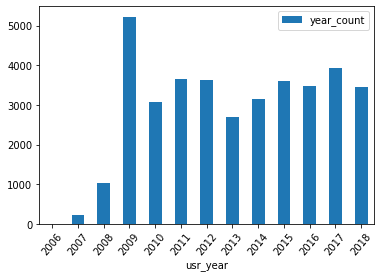

In [33]:
plt.figure(figsize=[40, 45]);
o.plot(x="usr_year", y="year_count", kind="bar", rot=50, fontsize=10);

Very Obvious how tweets in users created in 2018 are signifcally higher than other years

In [35]:
users_tweeted_2020 = tweet_df.groupby(['user.id_str','tweet_year','usr_year', 'full_text','days', 'hours']).size().reset_index(name='user_id_count')
users_tweeted_2020 = users_tweeted_2020[users_tweeted_2020['usr_year'] == 2018]
users_tweeted_2020

,user.id_str,tweet_year,usr_year,full_text,days,hours,user_id_count
0,1000005882049126400,2018,2018,Amber Heard q CRUSH!,72,11:11:53.000000000,1
3,1000091536485437440,2018,2018,"@dmataconis Amber Heard is striking, but not a...",213,03:53:13.000000000,1
4,1000111132957466624,2018,2018,"Amber heard na minha tv, eca",191,03:07:46.000000000,1
5,1000111132957466624,2018,2018,"sinto pena de fã da Amber heard, essa mulher é...",175,19:05:15.000000000,1
6,1000114035126190081,2018,2018,@unfoundation @ASteiner @PadmaLakshmi @realamb...,73,08:30:32.000000000,1
...,...,...,...,...,...,...,...
37178,999695938670223361,2018,2018,#WeAreProudOfJohnnyDepp ❤\n#IBelieveInHim ❤\n#...,72,00:37:22.000000000,1
37179,999695938670223361,2018,2018,I'm not gonna buy @LOrealParisUSA products any...,70,19:03:19.000000000,1
37180,999774404606390273,2018,2018,Is it me or does Amber Heard look A LOT like K...,185,21:21:50.000000000,1
37181,999853501676171265,2018,2018,LONDON FIELDS Official Trailer (2018) | Amber ...,148,08:37:31.000000000,1


In [36]:
users_tweeted_same_day = tweet_df.groupby(['user.id_str', 'days']).size().reset_index(name='user_id_count')
users_tweeted_same_day = users_tweeted_same_day[users_tweeted_same_day['days'] <=1]
users_tweeted_same_day = users_tweeted_same_day.sort_values(["days"], ascending=True)
print("Saved that in a DF")
users_tweeted_same_day

Saved that in a DF


,user.id_str,days,user_id_count
6,1000114035126190081,0,1
30504,959340965310812160,0,1
1677,1059882160851578880,0,2
1689,1060627835805622272,0,2
1733,1062947259929804800,0,1
...,...,...,...
1923,1078635204317720577,1,1
30213,950011789105876994,1,1
30307,952563525494321153,1,1
31798,997546436840640512,1,1


In [37]:
tweets_day = tweet_df.groupby('tweet_date').size().reset_index(name='date_count')
tweets_day = tweets_day.sort_values(["date_count"], ascending=False)
print("Saved that in a DF")
tweets_day

Saved that in a DF


,tweet_date,date_count
301,2018-12-20,715
295,2018-12-13,692
188,2018-08-16,685
178,2018-08-02,634
232,2018-10-04,612
...,...,...
139,2018-06-15,1
168,2018-07-20,1
170,2018-07-24,1
189,2018-08-17,1


In [38]:
tweets_day_list = set(list(tweets_day.tweet_date))

In [39]:
full_data_dates  = tweet_df[tweet_df['tweet_date'].isin(tweets_day_list)]
full_data_dates

,id_str,full_text,user.id_str,user.screen_name,user.name,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,...,days,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month
0,1075814459975835648,AMBER HEARD DAILY ● Votre source française déd...,1075784710389985281,ahearddaily,Amber Heard Daily,Your most completed fan account dedicated to t...,http://pbs.twimg.com/profile_images/1363931518...,https://pbs.twimg.com/profile_banners/10757847...,https://t.co/hT9fpXu3KB,893,...,0,01:58:13.000000000,2018-12-20,18:05:29,2018-12-20,16:07:16,2018,December,2018,December
1,1049446873562587137,I don't know the whole situation with Johnny D...,1049442144577052672,RougeWild,The Wild Hunt,Gamer/Animal-lover/Digital Artist (sometimes)/...,http://pbs.twimg.com/profile_images/1049444164...,https://pbs.twimg.com/profile_banners/10494421...,NaN,18,...,0,00:18:48.000000000,2018-10-08,23:50:07,2018-10-08,23:31:19,2018,October,2018,October
2,1023383244060803072,"AQUAMAN 2018 : Jason , Amber Heard Superhero M...",1023045188464177152,OhsemV,Ohsem_Viral,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,6,...,0,22:23:19.000000000,2018-07-29,01:42:33,2018-07-28,03:19:14,2018,July,2018,July
3,1078581466185949184,this is like only my second tweet but let it b...,1078236203642585089,shusreen,shireen,teh but make it tarik | https://t.co/hvaCku8NBl,http://pbs.twimg.com/profile_images/1363801856...,https://pbs.twimg.com/profile_banners/10782362...,https://t.co/KzW64aIUjA,5913,...,0,22:51:57.000000000,2018-12-28,09:20:35,2018-12-27,10:28:38,2018,December,2018,December
4,1078697761267204097,@AlbertsStuff we love a salty sister amber hea...,1078695623522693120,Ruby87131098,Ruby,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,4,...,0,00:08:30.000000000,2018-12-28,17:02:42,2018-12-28,16:54:12,2018,December,2018,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37181,1053730623574237186,"Hahaha okay, I’ve just seen the interview Ambe...",4845862516,AutumnOnVenus,Elle-Rose 🍁,Resting cunt face | Undergrad Investigative Jo...,http://pbs.twimg.com/profile_images/1280914053...,https://pbs.twimg.com/profile_banners/48458625...,https://t.co/zILfNbVT5S,12040,...,999,04:22:47.000000000,2018-10-20,19:32:12,2016-01-25,15:09:25,2018,October,2016,January
37182,1058021601395007488,Amber heard is a abuser. Johnny depp is a surv...,4879913728,Depplydepp,Depplydepp,"#ibelievehim\nFeel free to send me a message, ...",http://pbs.twimg.com/profile_images/1048102086...,https://pbs.twimg.com/profile_banners/48799137...,NaN,1984,...,999,12:56:24.000000000,2018-11-01,15:43:01,2016-02-06,02:46:37,2018,November,2016,February
37183,1075876225917313034,Amber Heard como Mera es genial. Molona y con ...,713774689269768192,GeekZoneGZ,Geek Zone ︾⍟︾ #SamMyCap,"🎩 CEO de buenas noticias: Marvel, Disney, Star...",http://pbs.twimg.com/profile_images/1372187467...,https://pbs.twimg.com/profile_banners/71377468...,https://t.co/Gz7EImAbny,56344,...,999,05:02:13.000000000,2018-12-20,22:10:55,2016-03-26,17:08:42,2018,December,2016,March
37184,957681535095734272,Amber Heard Super Hot Scenes Compilation\n(Hot...,3185840166,Punk_Affected,The Marvel Eternity,"Heroes are made by the path they choose, not t...",http://pbs.twimg.com/profile_images/1026897612...,https://pbs.twimg.com/profile_banners/31858401...,https://t.co/Oilx7YdsEY,354,...,999,12:08:10.000000000,2018-01-28,18:27:25,2015-05-05,06:19:15,2018,January,2015,May


In [45]:
print('trendy dates')
trendy_dates = tweets_day[tweets_day.date_count >=500]
trendy_dates

trendy dates


,tweet_date,date_count
301,2018-12-20,715
295,2018-12-13,692
188,2018-08-16,685
178,2018-08-02,634
232,2018-10-04,612
302,2018-12-23,567
154,2018-07-04,542
298,2018-12-16,539
296,2018-12-14,516
233,2018-10-05,506


<Figure size 2880x3240 with 0 Axes>

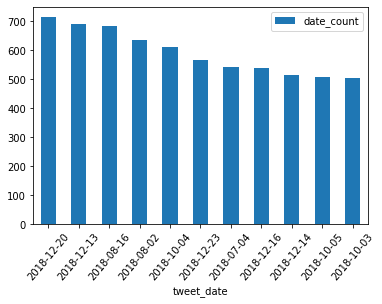

In [46]:
plt.figure(figsize=[40, 45]);
trendy_dates.plot(x="tweet_date", y="date_count", kind="bar", rot=50, fontsize=10);

In [47]:
trend_dates = set(list(trendy_dates.tweet_date))

In [48]:
full_data_trendy_dates  = tweet_df[tweet_df['tweet_date'].isin(trend_dates)]

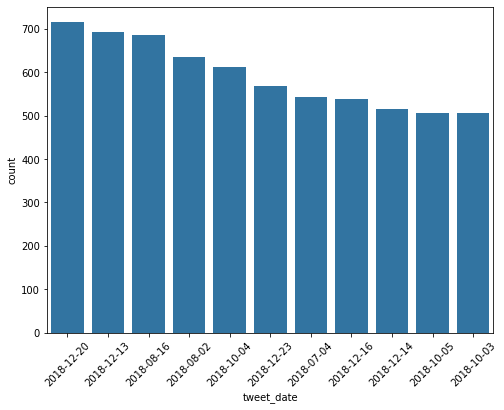

In [49]:
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = full_data_trendy_dates['tweet_date'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=full_data_trendy_dates, x='tweet_date', color=base_color, order=freq.index);
plt.xticks(rotation=45);

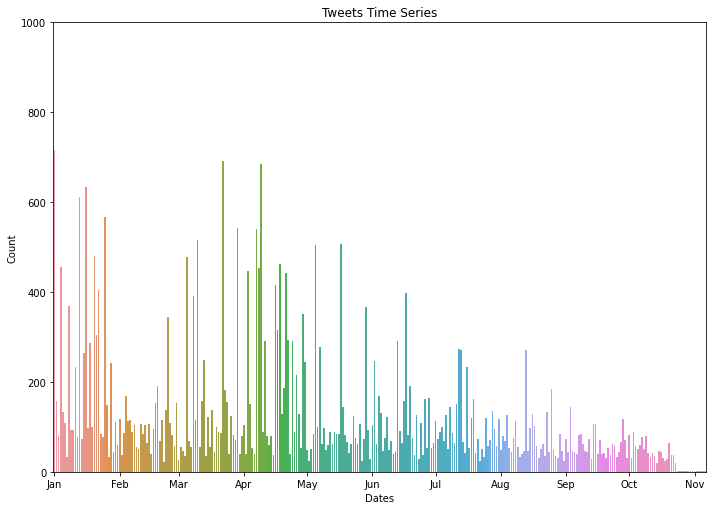

In [51]:
import matplotlib.dates as mdates
import seaborn as snb

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = 'tweet_date', data = full_data_dates)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Dates')
plt.ylim(0,1000)
plt.ylabel('Count')
plt.title('Tweets Time Series')
plt.show()

In [52]:
freq_usrs = tweet_df.groupby('user.id_str').size().reset_index(name='id_count')
freq_usrs = freq_usrs[freq_usrs["id_count"] > 1]
freq_usrs = freq_usrs.sort_values(["id_count"], ascending=False)
print("Saved that in a DF")
freq_usrs

Saved that in a DF


,user.id_str,id_count
11613,4583281223,221
8521,3064671053,212
9923,350990667,212
12051,4845862516,199
6190,2465079218,186
...,...,...
8810,315331352,2
8814,315454369,2
8820,3156534129,2
8833,3160000676,2


# let's check the distribution for different features to visualize them correctly

A:\Programming\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


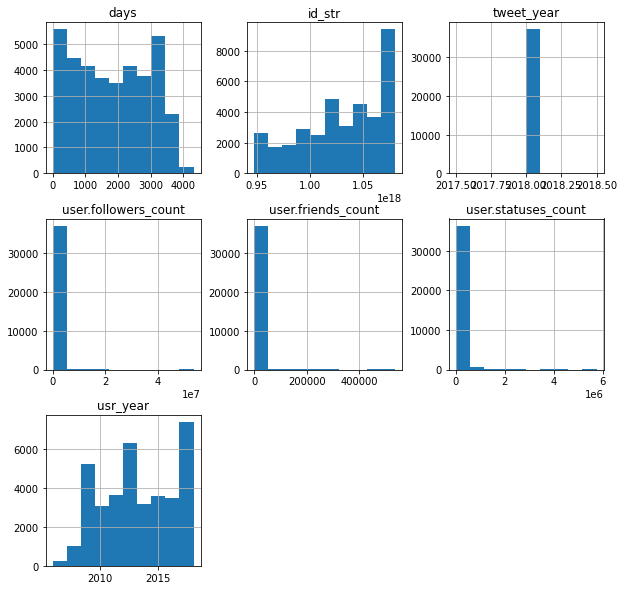

In [53]:
tweet_df.hist(figsize=(10,10));

# checking the distribution of the days

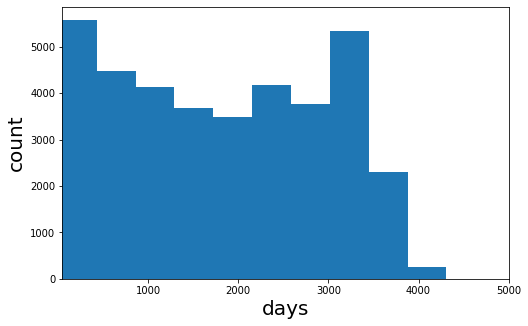

In [54]:
plt.figure(figsize=[8, 5])
plt.hist(data = tweet_df, x = 'days')
plt.xlabel('days', fontsize=20)
plt.xlim(50,5000)
plt.ylabel('count', fontsize=20)
plt.show();

users tweeted in less than 24 hours after creation showing ubnormal count!

# usr creation counts in various years¶


In [55]:
tweet_df.usr_year.value_counts()

2009    5224
2017    3935
2011    3647
2012    3625
2015    3606
2016    3483
2018    3452
2014    3160
2010    3080
2013    2702
2008    1038
2007     233
2006       1
Name: usr_year, dtype: int64

In [56]:
tweet_df.groupby("usr_year")["usr_month"].value_counts()

usr_year  usr_month
2006      December       1
2007      March         51
          August        29
          November      28
          October       25
                      ... 
2018      March        231
          October      207
          September    140
          November     105
          December      97
Name: usr_month, Length: 145, dtype: int64

In [57]:
tweet_df.groupby("usr_year")["usr_month"].value_counts()

usr_year  usr_month
2006      December       1
2007      March         51
          August        29
          November      28
          October       25
                      ... 
2018      March        231
          October      207
          September    140
          November     105
          December      97
Name: usr_month, Length: 145, dtype: int64

# Let's explore more

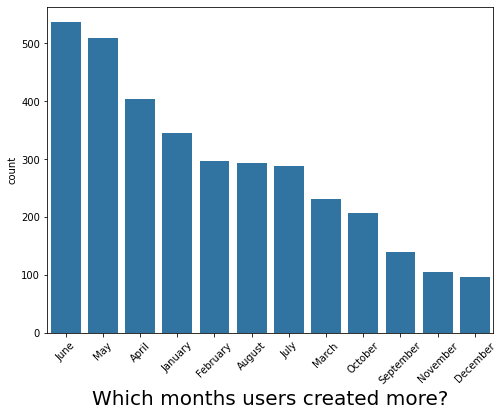

In [60]:
we = tweet_df[tweet_df['usr_year'] == 2018]
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = filtrd_df['usr_month'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=we, x='usr_month', color=base_color, order=freq.index);
plt.xticks(rotation=45);
plt.xlabel('Which months users created more?', fontsize=20);

seems that June., may,Apr.,  have more usrs created

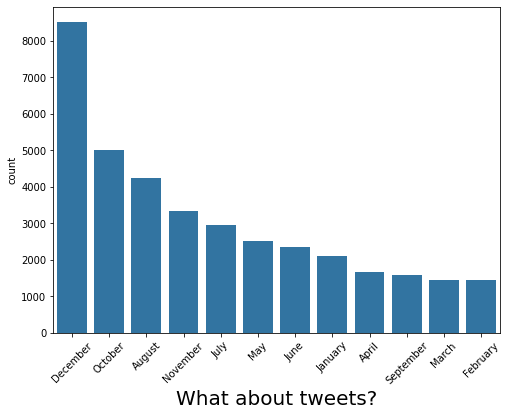

In [61]:
plt.figure(figsize=[8, 6])
base_color = sb.color_palette()[0]
freq = tweet_df['tweet_month'].value_counts() # To order the bars, often used with nominal variables
sb.countplot(data=tweet_df, x='tweet_month', color=base_color, order=freq.index);
plt.xticks(rotation=45);
plt.xlabel('What about tweets?', fontsize=20);

Dec., Oct.,Aug. There is no matching .. 

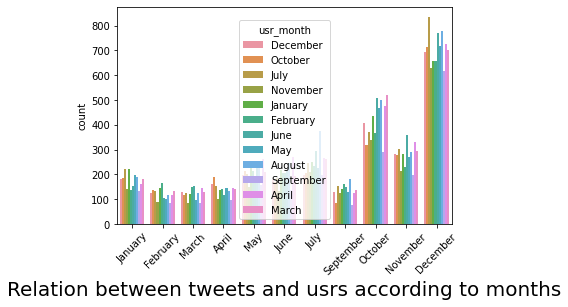

In [68]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','September','October','November','December']
sb.countplot(data = tweet_df, x='tweet_month', order=month_order, hue='usr_month')
plt.xticks(rotation=45);
plt.xlabel('Relation between tweets and usrs according to months', fontsize=20);

Some months have common increase in usrs created and tweets tweeted by them .. sure for a reason

In [63]:
## making a cutting function
def cutting(col_name):    
    return pd.cut(tweet_df[col_name], bins=4, labels=['very low','low', 'medium','high'])
tweet_df['cut_days']=cutting('days')

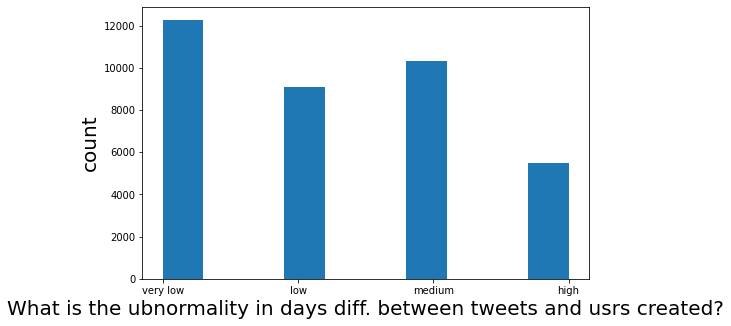

In [64]:
plt.figure(figsize=[8, 5])
plt.hist(data = tweet_df, x = 'cut_days')
plt.xlabel('cut_days', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.xlabel('What is the ubnormality in days diff. between tweets and usrs created?', fontsize=20);
plt.show();


users created and tweeted imm.after creation is the most common feature!

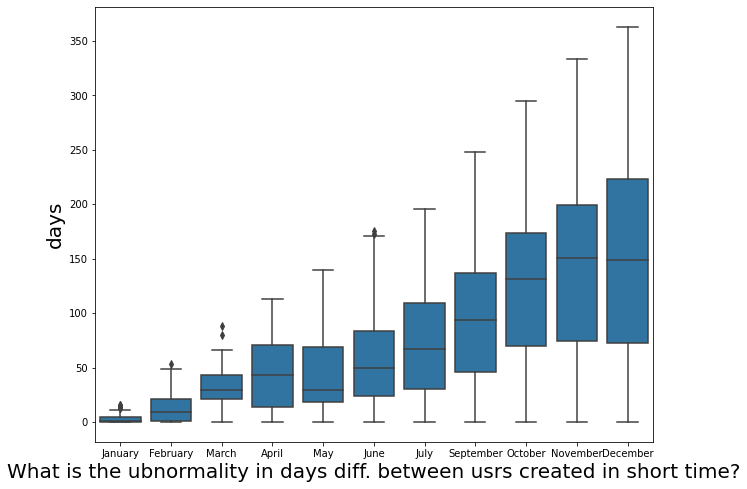

In [65]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','September','October','November','December']
plt.figure(figsize=[10, 8])
sb.boxplot(data=we, x='tweet_month', y='days',order=month_order, color=base_color);
plt.xlabel('tweet_month', fontsize=20);
plt.ylabel('days', fontsize=20);
plt.xlabel('What is the ubnormality in days diff. between usrs created in short time?', fontsize=20);


in Jan., Feb. the days diff is less than one day more than other months and Mar., may., jul. the days diff is also in a very short period of time than rest of the months, This is for tweet_months

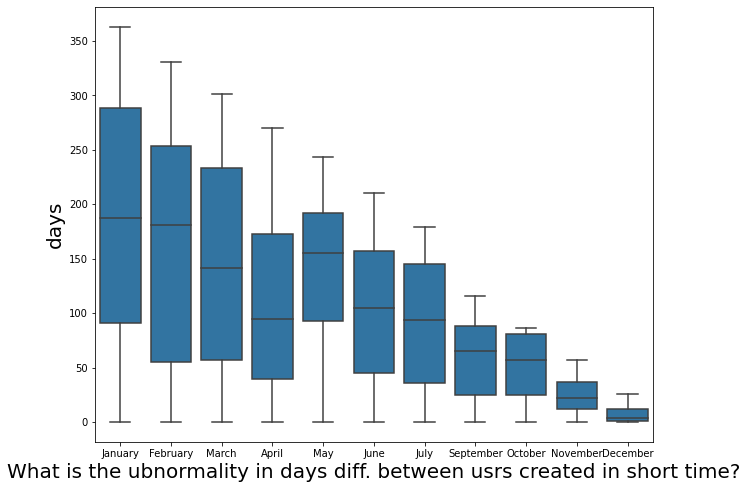

In [71]:
plt.figure(figsize=[10, 8])
sb.boxplot(data=we, x='usr_month', y='days',order=month_order, color=base_color);
plt.xlabel('usr_month', fontsize=20);
plt.xlabel('What is the ubnormality in days diff. between usrs created in short time?', fontsize=20);
plt.ylabel('days', fontsize=20);

# scatter plot of days vs. usr_month, with log transform on days y axis

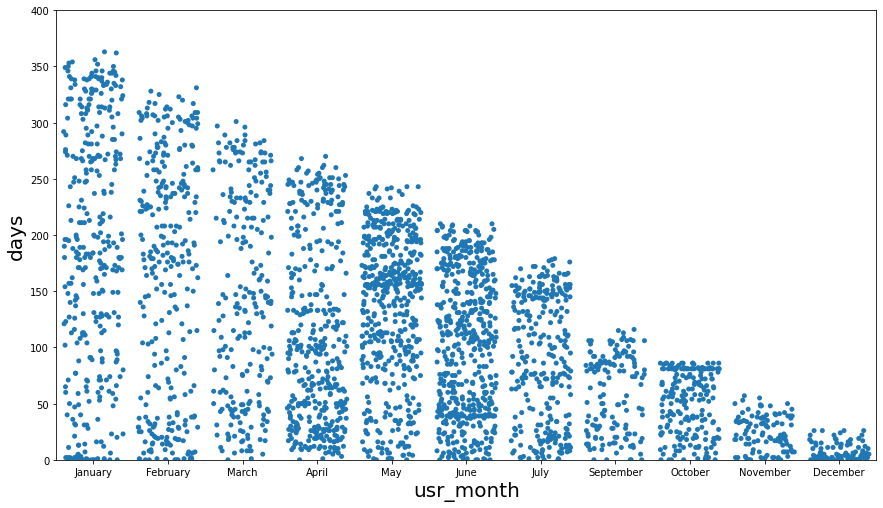

In [72]:

plt.figure(figsize = [14.70, 8.27])
sb.stripplot(data = we, x = 'usr_month', y = 'days', jitter = 0.40, color = base_color, order = month_order)
plt.xlabel('usr_month', fontsize=20)
plt.ylim(0, 400)
plt.ylabel('days', fontsize=20)
plt.show();

In [73]:
clean_df = tweet1

In [74]:
clean_df['tweet_date'] = pd.to_datetime(clean_df['tweet_date'])
clean_df['user_create_date'] = pd.to_datetime(clean_df['user_create_date'])

In [75]:
clean_df[clean_df['usr_year']== 2018]['usr_month'].value_counts()

June         536
May          509
April        404
January      345
February     296
August       294
July         288
March        231
October      207
September    140
November     105
December      97
Name: usr_month, dtype: int64

In [76]:
z = clean_df[clean_df['usr_year']== 2018]
z.shape

(3452, 22)

3452 usrs were created in 2020 only .. by investigating each month seperately must have something in common

# June...

In [78]:
A = clean_df[clean_df['usr_month']== 'June'].sort_values(["days"], ascending=True)
# A[A['days']<=1]
print(A.shape[0])

3421


In [79]:
A['cut_days'] = cutting('days')

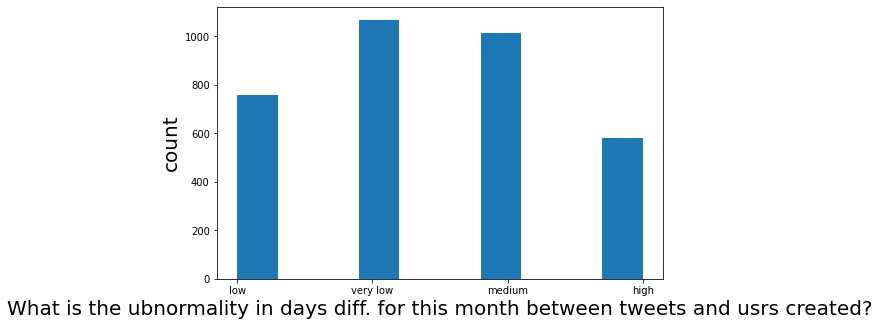

In [80]:
plt.figure(figsize=[8, 5])
plt.hist(data = A, x = 'cut_days')
plt.xlabel('cut_days', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.xlabel('What is the ubnormality in days diff. for this month between tweets and usrs created?', fontsize=20);
plt.show();

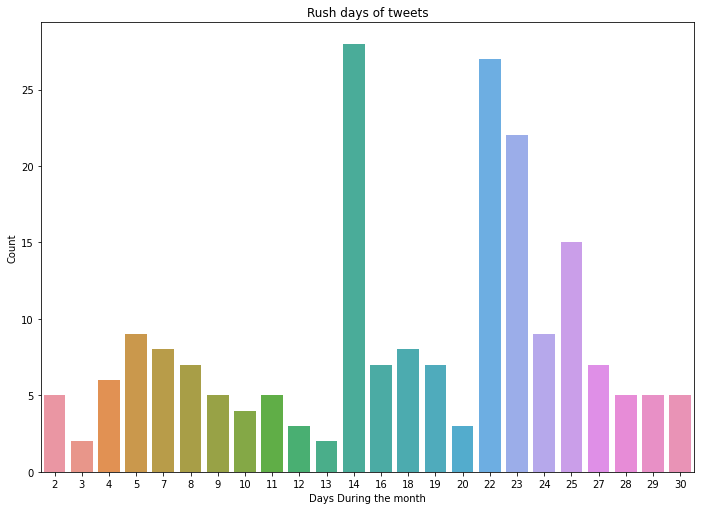

In [82]:
fltrd_A = A[A['tweet_month']== 'June'].sort_values(["days"], ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = fltrd_A['tweet_date'].dt.day, data = A)
plt.xlabel('Days During the month')
plt.ylabel('Count')
plt.title('Rush days of tweets')
plt.show();

In [104]:
A['usr_year'].astype(int)
A['days'] = A['days'].astype(int)

In [108]:
tt = A.groupby(['user.id_str','tweet_month','usr_year', 'full_text','days', 'hours', 'tweet_date', 'usr_month']).size().reset_index(name='user_id_count')
tt = tt[tt["usr_year"] == 2018]
tt = tt.sort_values(["days"], ascending=True)
print('no. of tweet in 0-10 days Age:', (tt[tt["days"] <=10].shape[0]))
print('no. of tweet from 2018 users:', (tt.shape[0]))
tt

no. of tweet in 0-10 days Age: 31
no. of tweet from 2018 users: 536


,user.id_str,tweet_month,usr_year,full_text,days,hours,tweet_date,usr_month,user_id_count
3189,1007678346673696770,June,2018,@hardball Do you plan on reporting Hillary’s p...,0,07:32:12.000000000,2018-06-16,June,1
3194,1007984111573721090,June,2018,amber heard that’s it that’s the tweet,0,05:52:36.000000000,2018-06-16,June,1
3093,1006215411376054273,June,2018,CHERCHE RECHERCHE RPG\n\n| J'aimerais une Ambe...,0,16:47:06.000000000,2018-06-12,June,1
3188,1007678346673696770,June,2018,@CNN @CNNOpinion CNN not only does fake news b...,0,07:00:34.000000000,2018-06-16,June,1
2957,1003495526170386432,June,2018,personal style heroes of mine would be @amtend...,0,00:29:25.000000000,2018-06-04,June,1
...,...,...,...,...,...,...,...,...,...
2930,1003051234897612811,December,2018,Amber Heard\nBeautiful 😍🔥\n#aquamanmovie2018🌊💪...,208,04:04:32.000000000,2018-12-28,June,1
2932,1003051234897612811,December,2018,Amber Heard\nBeautiful 😍🔥\nMera Christmas ever...,208,07:51:31.000000000,2018-12-28,June,1
2939,1003051234897612811,December,2018,Amber Heard\naquamanmovie \n#aquamanmovie2018🌊...,209,23:58:43.000000000,2018-12-29,June,1
2910,1002982992430686208,December,2018,Aquaman'deki Mera karakteriyle Amber Heard'ı @...,210,04:41:36.000000000,2018-12-29,June,1


In [111]:
df = tweet_df
df.head()

,id_str,full_text,user.id_str,user.screen_name,user.name,user.description,user.profile_image_url,user.profile_banner_url,user.url,user.statuses_count,...,hours,tweet_date,tweet_time,user_create_date,user_create_time,tweet_year,tweet_month,usr_year,usr_month,cut_days
0,1075814459975835648,AMBER HEARD DAILY ● Votre source française déd...,1075784710389985281,ahearddaily,Amber Heard Daily,Your most completed fan account dedicated to t...,http://pbs.twimg.com/profile_images/1363931518...,https://pbs.twimg.com/profile_banners/10757847...,https://t.co/hT9fpXu3KB,893,...,01:58:13.000000000,2018-12-20,18:05:29,2018-12-20,16:07:16,2018,December,2018,December,very low
1,1049446873562587137,I don't know the whole situation with Johnny D...,1049442144577052672,RougeWild,The Wild Hunt,Gamer/Animal-lover/Digital Artist (sometimes)/...,http://pbs.twimg.com/profile_images/1049444164...,https://pbs.twimg.com/profile_banners/10494421...,NaN,18,...,00:18:48.000000000,2018-10-08,23:50:07,2018-10-08,23:31:19,2018,October,2018,October,very low
2,1023383244060803072,"AQUAMAN 2018 : Jason , Amber Heard Superhero M...",1023045188464177152,OhsemV,Ohsem_Viral,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,6,...,22:23:19.000000000,2018-07-29,01:42:33,2018-07-28,03:19:14,2018,July,2018,July,very low
3,1078581466185949184,this is like only my second tweet but let it b...,1078236203642585089,shusreen,shireen,teh but make it tarik | https://t.co/hvaCku8NBl,http://pbs.twimg.com/profile_images/1363801856...,https://pbs.twimg.com/profile_banners/10782362...,https://t.co/KzW64aIUjA,5913,...,22:51:57.000000000,2018-12-28,09:20:35,2018-12-27,10:28:38,2018,December,2018,December,very low
4,1078697761267204097,@AlbertsStuff we love a salty sister amber hea...,1078695623522693120,Ruby87131098,Ruby,NaN,http://abs.twimg.com/sticky/default_profile_im...,NaN,NaN,4,...,00:08:30.000000000,2018-12-28,17:02:42,2018-12-28,16:54:12,2018,December,2018,December,very low


In [112]:
df['tweet_date'] = pd.to_datetime(df['tweet_date'])
df['tweet_time'] = pd.to_datetime(df['tweet_time'])
df['user_create_date'] = pd.to_datetime(df['user_create_date'])
df['user_create_time'] = pd.to_datetime(df['user_create_time'])

# Investigation on users Created Over Time

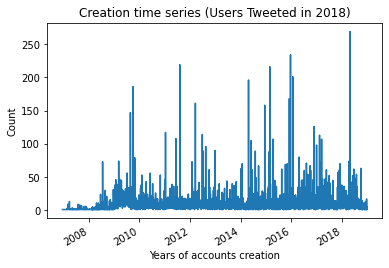

In [113]:
df['user_create_date'].value_counts().plot()
plt.xlabel('Years of accounts creation')
plt.ylabel('Count')
plt.title('Creation time series (Users Tweeted in 2018)');

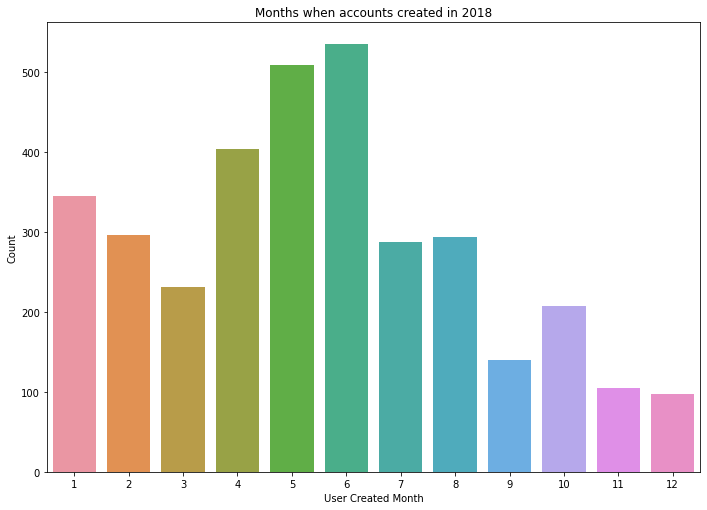

In [114]:
users_cre_18 = df[df['user_create_date'].dt.year == 2018]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_18['user_create_date'].dt.month, data = df)
plt.xlabel('User Created Month')
plt.ylabel('Count')
plt.title('Months when accounts created in 2018')
plt.show()

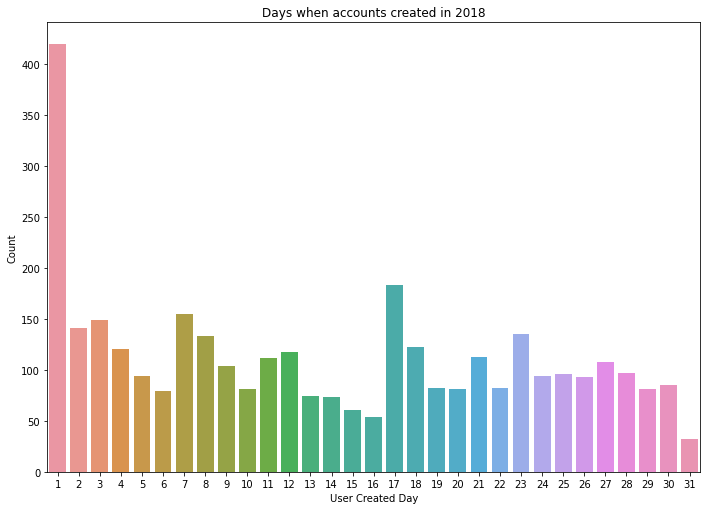

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
snb.countplot(x = users_cre_18['user_create_date'].dt.day, data = df)
plt.xlabel('User Created Day')
plt.ylabel('Count')
plt.title('Days when accounts created in 2018')

plt.show()